# Imports

In [91]:
import numpy as np 
import pandas as pd
from pandas_profiling import ProfileReport
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn import metrics
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn import preprocessing
import pickle as pickle_rick

# Data reading

In [92]:
%time df = pd.read_csv('C:\\Users\\Yousef\\Desktop\\ml\\ML_Dataset\\spotify_training.csv',parse_dates = ['release_date'])

Wall time: 4.93 s


In [93]:
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,tempo,release_date,speechiness,popularity
0,0.184,2019.0,0.43400,['Swavay'],0.783,198577.0,0.3410,1.0,3g3RCV5ImXwzHpKwM2iunc,0.000098,7.0,0.3620,-12.353,1.0,2:00 AM,126.799,2019-05-24,0.0727,58
1,0.615,2019.0,0.02670,"['KAYTRANADA', 'Kali Uchis']",0.794,186680.0,0.7570,1.0,41SwdQIX8Hy2u6fuEDgvWr,0.000306,6.0,0.0621,-6.644,0.0,10%,107.990,2019-12-13,0.1230,68
2,0.368,1997.0,0.78200,['Elliott Smith'],0.489,198973.0,0.0858,0.0,53q5m5Bpkr1Pin7mPKQxMi,0.000109,4.0,0.1110,-20.465,0.0,2:45 AM,167.284,1997-02-25,0.0432,38
3,0.199,2017.0,0.00306,['Casey Donahew'],0.295,272787.0,0.6630,0.0,6LjvqlPeCj62wF4oPJ6XOe,0.000000,7.0,0.1140,-5.253,1.0,3:00 AM,100.010,2017-10-06,0.0337,57
4,0.539,2018.0,0.38500,['Bazzi'],0.651,167019.0,0.6540,1.0,6pmZMP2ET1OJi5rKfLO8jD,0.000000,1.0,0.1810,-5.481,1.0,3:15,141.975,2018-04-12,0.0466,70


# Data Exploration


In [94]:
#pandas_profile = ProfileReport(df, title='Song Pop Profiling Report', explorative = True)
#pandas_profile.to_file("SongPop.html")

In [95]:
#df.info()

In [96]:
categorical_cols = ['name','artists','key']

def unique_vals(dataframe,cat_cols):
    for c in cat_cols:
        print("{col} has {unique_val} unique values".format(col = c , unique_val = dataframe[c].nunique()))

unique_vals(df,categorical_cols)



name has 95654 unique values
artists has 26731 unique values
key has 12 unique values


In [97]:
df.duplicated().sum()
df = df[~df.duplicated()==1]

In [98]:
def dataframe_nulls(dataframe):
    return dataframe.isnull().sum()
dataframe_nulls(df)
#df.dropna(axis=0,inplace=True)

valence              133
year                 109
acousticness          84
artists              209
danceability          84
duration_ms          614
energy                84
explicit              84
id                   350
instrumentalness      84
key                   84
liveness              84
loudness              84
mode                  84
name                1478
tempo                 84
release_date         422
speechiness           84
popularity             0
dtype: int64

In [99]:
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,tempo,release_date,speechiness,popularity
0,0.184,2019.0,0.43400,['Swavay'],0.783,198577.0,0.3410,1.0,3g3RCV5ImXwzHpKwM2iunc,0.000098,7.0,0.3620,-12.353,1.0,2:00 AM,126.799,2019-05-24,0.0727,58
1,0.615,2019.0,0.02670,"['KAYTRANADA', 'Kali Uchis']",0.794,186680.0,0.7570,1.0,41SwdQIX8Hy2u6fuEDgvWr,0.000306,6.0,0.0621,-6.644,0.0,10%,107.990,2019-12-13,0.1230,68
2,0.368,1997.0,0.78200,['Elliott Smith'],0.489,198973.0,0.0858,0.0,53q5m5Bpkr1Pin7mPKQxMi,0.000109,4.0,0.1110,-20.465,0.0,2:45 AM,167.284,1997-02-25,0.0432,38
3,0.199,2017.0,0.00306,['Casey Donahew'],0.295,272787.0,0.6630,0.0,6LjvqlPeCj62wF4oPJ6XOe,0.000000,7.0,0.1140,-5.253,1.0,3:00 AM,100.010,2017-10-06,0.0337,57
4,0.539,2018.0,0.38500,['Bazzi'],0.651,167019.0,0.6540,1.0,6pmZMP2ET1OJi5rKfLO8jD,0.000000,1.0,0.1810,-5.481,1.0,3:15,141.975,2018-04-12,0.0466,70


# Fill missing values

In [100]:
def fill_missing_values(df):
    df['valence'].fillna(df['valence'].median(),inplace=True)
    df['year'].fillna(df['year'].mean(),inplace=True)
    df['acousticness'].fillna(df['acousticness'].median(),inplace=True)
    df['danceability'].fillna(df['danceability'].median(),inplace=True)
    df['duration_ms'].fillna(df['duration_ms'].median(),inplace=True)
    df['energy'].fillna(df['energy'].mean(),inplace=True)
    df['explicit'].fillna(0,inplace=True)
    df['id'].fillna(df['id'].mode().iloc[0],inplace=True)
    df['instrumentalness'].fillna(df['instrumentalness'].median(),inplace=True)
    df['key'].fillna(df['key'].median(),inplace=True)
    df['liveness'].fillna(df['liveness'].mean(),inplace=True)
    df['loudness'].fillna(df['loudness'].median(),inplace=True)
    df['mode'].fillna(0,inplace=True)
    df['artists'].fillna(df['artists'].mode().iloc[0],inplace=True)
    df['name'].fillna(df['name'].mode().iloc[0],inplace=True)
    df['tempo'].fillna(df['tempo'].median(),inplace=True)
    df['release_date'].fillna(df['release_date'].mode().iloc[0],inplace=True)
    df['speechiness'].fillna(df['speechiness'].median(),inplace=True)
    
fill_missing_values(df)

In [101]:
def feature_encoder(df,cols):
    for c in cols:
        lbl = LabelEncoder()
        lbl.fit(list(df[c].values))
        df[c]=lbl.transform(list(df[c].values))
    return df

In [102]:
df.columns

Index(['valence', 'year', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'name', 'tempo', 'release_date',
       'speechiness', 'popularity'],
      dtype='object')

In [103]:
def duration_to_minutes(df):
    df['duration_m'] = df['duration_ms']/60000
    df = df.reindex(sorted(df.columns), axis=1)
    df.drop('duration_ms', axis = 1, inplace = True)
    return df
df = duration_to_minutes(df)

# Correlation between numeric values

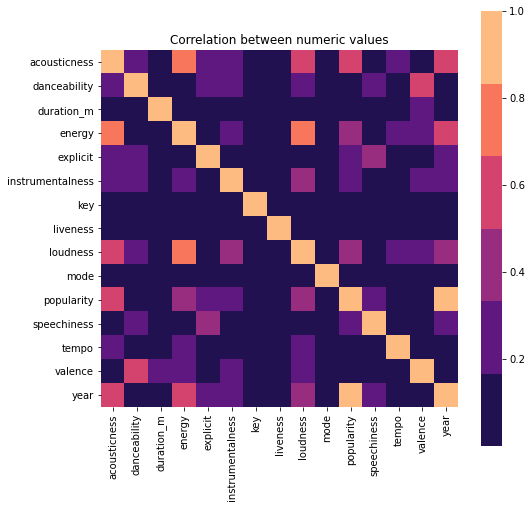

In [104]:
numeric_cols = df.columns[df.dtypes!='object']
numeric_df = pd.DataFrame(df[numeric_cols],columns= numeric_cols)
#Graphing matplotlib , seaborn
corr = np.abs(numeric_df.corr())
fig,ax = plt.subplots(figsize=(8,8))
cmap = sns.color_palette('magma')
sns.heatmap(corr,cmap = cmap,square=True)
plt.title("Correlation between numeric values")
plt.show()

# Visualization  between highly correlated feature and target

Wall time: 1.77 s


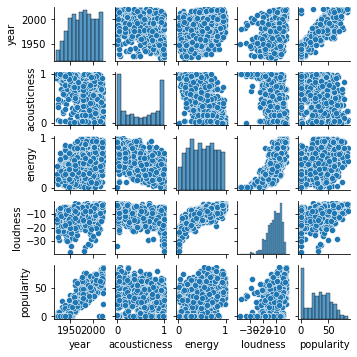

In [105]:
%time features_plot = sns.pairplot(df.sample(1000),height=1,vars=['year','acousticness','energy','loudness','popularity'])
plt.show()

# Categorical value with OneHotEncoder


In [106]:
def one_hot_enc(df,fldname):
    df[fldname] = df[fldname].astype('category')
    s = pd.Series(df[fldname])
    dummies = pd.get_dummies(s,'K')
    df = pd.concat([df,dummies],axis=1)
    df.drop([fldname],axis=1,inplace=True)
    return df
df = one_hot_enc(df,'key')
df.head()

,acousticness,artists,danceability,duration_m,energy,explicit,id,instrumentalness,liveness,loudness,...,K_2.0,K_3.0,K_4.0,K_5.0,K_6.0,K_7.0,K_8.0,K_9.0,K_10.0,K_11.0
0,0.43400,['Swavay'],0.783,3.309617,0.3410,1.0,3g3RCV5ImXwzHpKwM2iunc,0.000098,0.3620,-12.353,...,0,0,0,0,0,1,0,0,0,0
1,0.02670,"['KAYTRANADA', 'Kali Uchis']",0.794,3.111333,0.7570,1.0,41SwdQIX8Hy2u6fuEDgvWr,0.000306,0.0621,-6.644,...,0,0,0,0,1,0,0,0,0,0
2,0.78200,['Elliott Smith'],0.489,3.316217,0.0858,0.0,53q5m5Bpkr1Pin7mPKQxMi,0.000109,0.1110,-20.465,...,0,0,1,0,0,0,0,0,0,0
3,0.00306,['Casey Donahew'],0.295,4.546450,0.6630,0.0,6LjvqlPeCj62wF4oPJ6XOe,0.000000,0.1140,-5.253,...,0,0,0,0,0,1,0,0,0,0
4,0.38500,['Bazzi'],0.651,2.783650,0.6540,1.0,6pmZMP2ET1OJi5rKfLO8jD,0.000000,0.1810,-5.481,...,0,0,0,0,0,0,0,0,0,0


In [107]:
sptfy = df.iloc[:,:]

# Drop NAME,ID columns

In [108]:
sptfy.drop(['name','id'],axis=1,inplace=True)

In [109]:
cat_col = ['artists']
sptfy = feature_encoder(sptfy,cat_col)
X,y = sptfy.drop('popularity',axis=1),sptfy.popularity

# Features Generation

In [110]:
def add_datepart(df,fieldname):
    fld = df[fieldname]
    targ_pre = re.sub('[Dd]ate$','',fieldname)
    for n in ('Month','Week','Day','Dayofweek','Is_month_end','Is_month_start','Is_quarter_end',
              'Is_quarter_start','Is_year_end','Is_year_start'):    
        df[targ_pre+n]=getattr(fld.dt,n.lower())
    df[targ_pre+'Elapsed']=(fld-fld.min()).dt.days
    df.drop(fieldname,axis=1,inplace=True)

In [111]:
add_datepart(X,'release_date')

C:\Users\Yousef\Anaconda3\envs\spotify_model\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [112]:
X.columns

Index(['acousticness', 'artists', 'danceability', 'duration_m', 'energy',
       'explicit', 'instrumentalness', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'valence', 'year', 'K_0.0', 'K_1.0', 'K_2.0',
       'K_3.0', 'K_4.0', 'K_5.0', 'K_6.0', 'K_7.0', 'K_8.0', 'K_9.0', 'K_10.0',
       'K_11.0', 'release_Month', 'release_Week', 'release_Day',
       'release_Dayofweek', 'release_Is_month_end', 'release_Is_month_start',
       'release_Is_quarter_end', 'release_Is_quarter_start',
       'release_Is_year_end', 'release_Is_year_start', 'release_Elapsed'],
      dtype='object')

# Feature Scaling

In [113]:
def MinMax_normalization(X):
    MinMax = preprocessing.MinMaxScaler()
    MinMax.fit(X)
    X = pd.DataFrame(MinMax.transform(X),columns = X.columns)
    return X
X = MinMax_normalization(X)

In [114]:
#Scale = preprocessing.scale(X)
#X = pd.DataFrame(Scale,columns = X.columns)

# Modeling

In [115]:
X_train,X_valid_test,Y_train,Y_vaild_test = train_test_split(X,y,test_size=0.2,random_state=0,shuffle=True)
X_valid,X_test,Y_valid,Y_test = train_test_split(X_valid_test,Y_vaild_test,test_size = 0.5,random_state=0,shuffle=True)

In [116]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(96247, 37)
(12031, 37)
(12031, 37)


In [32]:
m = RandomForestRegressor(n_estimators = 120,min_samples_leaf = 3,max_depth =7 ,max_features=0.5,n_jobs=-1)
%time m.fit(X_train,Y_train)


Wall time: 6.85 s


RandomForestRegressor(max_depth=7, max_features=0.5, min_samples_leaf=3,
                      n_estimators=120, n_jobs=-1)

# Save the model

In [120]:
filename = "C:\\Users\\Yousef\\Desktop\\ml\\saved_regression_models\\XGB.pkl"
pickle_rick.dump(XGB,open(filename,'wb'))

In [271]:
m = pickle_rick.load(open(filename, 'rb'))

In [33]:
# on valid
pred_train = m.predict(X_train)
pred = m.predict(X_valid)
print("Score on Training set = {score}".format(score = m.score(X_train,Y_train)))
print("MSE of Training set = {MSE}".format(MSE=metrics.mean_squared_error(Y_train,pred_train)))
print("Score on validation set = "+str(m.score(X_valid,Y_valid)))
print("MSE of Validation set = "+str(metrics.mean_squared_error(np.array(Y_valid),pred)))
# On test set
test_pred = m.predict(X_test)
print("Score on Test set (Random Forest) = "+str(m.score(X_test,Y_test)))
print("MSE of Test set (Random Forest) = "+str(metrics.mean_squared_error(test_pred,Y_test)))

Score on Training set = 0.7981708329075451
MSE of Training set = 94.05863087952962
Score on validation set = 0.7979596685992973
MSE of Validation set = 95.8837392166497
Score on Test set (Random Forest) = 0.7933540056340899
MSE of Test set (Random Forest) = 96.47090344939032


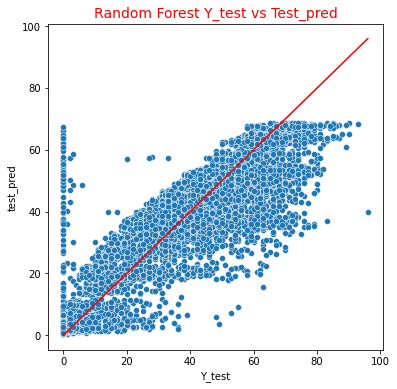

In [34]:
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.scatterplot(x=Y_test, y=test_pred)
sns.lineplot(x=Y_test, y=Y_test, color='red', ax=ax)
ax.set_xlabel('Y_test')
ax.set_ylabel('test_pred')
ax.set_title('Random Forest Y_test vs Test_pred', fontsize=14, color='red')
plt.show()


# Linear Regression Model

In [35]:
lr = LinearRegression()
%time lr.fit(X_train,Y_train)

Wall time: 129 ms


LinearRegression()

In [36]:
# on valid
pred_train = lr.predict(X_train)
pred = lr.predict(X_valid)
print("Score on Training set = "+str(lr.score(X_train,Y_train)))
print("MSE of Training set = "+str(metrics.mean_squared_error(Y_train,pred_train)))
print("Score on validation set = "+str(lr.score(X_valid,Y_valid)))
print("MSE of Validation set = "+str(metrics.mean_squared_error(np.array(Y_valid),pred)))
# On test set
test_pred = lr.predict(X_test)
print("Score on Test set (LR) = "+str(lr.score(X_test,Y_test)))
print("MSE of Test set (LR) = "+str(metrics.mean_squared_error(test_pred,Y_test)))

Score on Training set = 0.7421181916605852
MSE of Training set = 120.18089441964199
Score on validation set = 0.7449468151044019
MSE of Validation set = 121.04243196079221
Score on Test set (LR) = 0.7386078486539325
MSE of Test set (LR) = 122.02867552459487


In [118]:
XGB = XGBRegressor(n_estimators = 200,max_depth = 5,learning_rate=0.1,n_jobs=-1)
%time XGB.fit(X_train,Y_train)

Wall time: 9.11 s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=-1, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [119]:
pred_train = XGB.predict(X_train)
pred = XGB.predict(X_valid)
print("Score on Training set = "+str(XGB.score(X_train,Y_train)))
print("MSE of Training set = "+str(metrics.mean_squared_error(Y_train,pred_train)))
print("Score on validation set = "+str(XGB.score(X_valid,Y_valid)))
print("MSE of Validation set = "+str(metrics.mean_squared_error(np.array(Y_valid),pred)))

# On test set
test_pred = XGB.predict(X_test)
print("Score on Test set (LR) = "+str(XGB.score(X_test,Y_test)))
print("MSE of Test set (LR) = "+str(metrics.mean_squared_error(test_pred,Y_test)))


Score on Training set = 0.8272033933628394
MSE of Training set = 80.52856024260703
Score on validation set = 0.8171073730729593
MSE of Validation set = 86.79667481905241
Score on Test set (LR) = 0.8137309016827301
MSE of Test set (LR) = 86.95812495427072


In [128]:
def test_script(filepath,modelpath):
    test_data = pd.read_csv(filepath,parse_dates=['release_date'])
    test_data = test_data[~test_data.duplicated()==1]
    fill_missing_values(test_data)
    test_data = duration_to_minutes(test_data)
    test_data = one_hot_enc(test_data,'key')
    test_data.drop(['name','id'],axis=1,inplace=True)
    test_data = feature_encoder(test_data,['artists'])
    testX,testY = test_data.drop('popularity',axis=1),test_data.popularity
    add_datepart(testX,'release_date')
    testX = MinMax_normalization(testX)
    m = XGBRegressor(n_estimators = 200,learning_rate=0.1,n_jobs=-1).fit(X_train,Y_train)
    pred = m.predict(testX)
    print("Score on test set is {acc}".format(acc=m.score(testX,testY)))
    print("MSE of Test set = "+str(metrics.mean_squared_error(pred,testY)))